In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

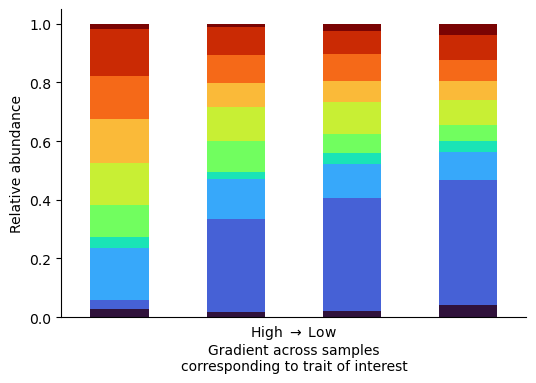

In [112]:
n_tax = 10
n_samples = 5

cols = [pd.Series(data=np.random.randint(0, 50, size=n_tax),
                  index=[f'tax{i}' for i in range(n_tax)],
                 name=f'sample_0')]

for i in range(1, n_samples-1):
    new_col = pd.Series(data=np.random.randint(0, 25, size=n_tax),
                  index=[f'tax{i}' for i in range(n_tax)],
                    name=f'sample_{i}')
        
    new_col.loc['tax1'] = new_col.loc['tax1'] + 100
    new_col = cols[i-1] + new_col
    cols.append(new_col)
        
        
                         
df = pd.concat(cols, axis=1)

# prev = 5
# for col in df.columns:
    
#     df.loc['tax1', col] = np.max([prev, df.loc['tax1', col]]) + 100
#     prev = df.loc['tax1', col]

plotdf = df.divide(df.sum())

fig, ax = plt.subplots(figsize=(6,4))
plotdf.T.plot(kind='bar', stacked=True, ax=ax, cmap='turbo')

ax.set_xlabel(r'High $\rightarrow$ Low' + '\nGradient across samples\ncorresponding to trait of interest')
ax.set_ylabel('Relative abundance')

plt.tick_params(labelbottom=False, bottom=False)
ax.get_legend().remove()
sns.despine()

plt.savefig('./../figures/conceptual_figures/Fig1A_taxon_abun_bars.svg', bbox_inches='tight')                   


In [113]:
import numpy as np
import pandas as pd
from ete3 import Tree
from scipy.stats import multivariate_normal
from scipy.spatial.distance import pdist, squareform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

import random

import os

os.environ['QT_QPA_PLATFORM']='offscreen'

In [114]:
from ete3.treeview import TreeStyle, NodeStyle

In [115]:
from itertools import product

In [116]:
import multiprocessing
import json
import os

In [182]:
tree = Tree('/data/mhoffert/fiererlab/periodic_phyla/finalized_data/gtdb_full_tree.nw', format=1, quoted_node_names=True)
tree.name = 'c000000'

In [183]:
tree.describe()

Number of leaf nodes:	62291
Total number of nodes:	124581
Rooted:	Yes
Most distant node:	RS_GCF_000508245_1
Max. distance:	3.398130


In [190]:
tree.get_children()

[Tree node 'c000001' (0x7fb12138451), Tree node 'c000002' (0x7fb11a07e89)]

In [235]:
for node in tree.traverse():
    if "c000001" in node.name:
        break

In [236]:
for internal in node.traverse():
    if len(internal.get_leaves()) > 150 and (len(internal.get_leaves()) < 200):
        print(internal.name, len(internal.get_leaves()))
        break

c000458 167


In [237]:
node.describe()

Number of leaf nodes:	695
Total number of nodes:	1389
Rooted:	Yes
Most distant node:	GB_GCA_003454065_1
Max. distance:	1.809040


In [238]:
colored_nodes = set(internal.iter_descendants()) | {internal}


def layout(node):
    ns = NodeStyle()
    ns['size'] = 0    
    # while _node.up is not None:
    #     _node = _node.up
    # if node in colored_nodes:
    #     ns['vt_line_color'] = 'darkblue'
    #     ns['hz_line_color'] = 'darkblue'

    node.img_style = ns
        
        
ts = TreeStyle()
ts.show_leaf_name = False
ts.mode = 'c'
# ts.scale=1000
ts.layout_fn = layout
ts.show_scale = False
ts.root_opening_factor = 0.5
ts.arc_start=180

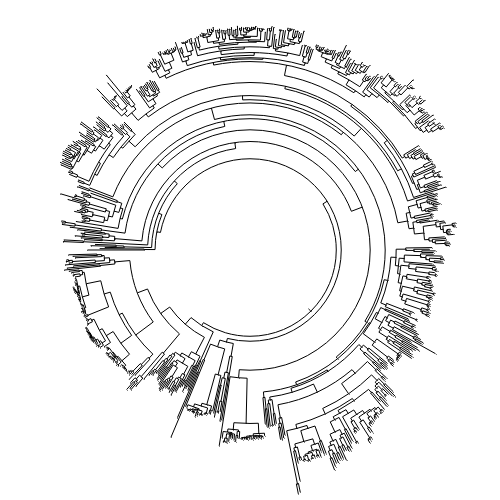

In [239]:
node.render('%%inline', tree_style=ts, w=500, h=500) #, h=250, w=50)

In [241]:
rendered = node.render('./../figures/conceptual_figures/Fig1C_tree.svg', tree_style=ts, w=500, h=500)#, w=200, h=200) #, h=250, w=50)

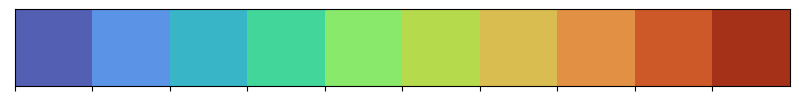

In [174]:
sns.palplot([sns.desaturate(s, 0.75) for s in sns.color_palette('turbo', n_colors=10)])